## 第一次课
1. 利用软件读取excel， 完成变量赋值，各个教学班级的分数统计(平均分，标准差)✔️
2. 比较各个教学班的教学效果，本次月考平均分与上学期末平均分的差距。✔️
3. 得出各个同学的各门课程的变化。统计各个教学班学生变化的平均值。✔️
4. 做一下2和3结果的直方图📊，每门课做一个。✔️


- 平均分 => 试卷难度
- 标准差 => 区分度

In [1]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IO = '月考成绩.xlsx'

wb = openpyxl.load_workbook(IO)
sheets = wb.get_sheet_names()
# df0 上学期末
# df1 第一次月考
df0 = pd.read_excel(io=IO,sheet_name=sheets[0])
df1 = pd.read_excel(io=IO,sheet_name=sheets[1])

/Users/hans/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  after removing the cwd from sys.path.


In [3]:
# df0

## 导入数据集并切分

In [4]:
N=9
# 六个教学班
types=df0.columns.tolist()

将N个教学班学科设置为 sub[0-N]

['生物班', '化学班', '物理班', '地理班', '历史班', '政治班'……]

In [5]:
subsClass=[]
subs=[]
for index in range(N):
#     locals()['sub'+str(index)] = types[index+1]
    subsClass.append(types[index+1])

In [6]:
subsClass

['生物班', '化学班', '物理班', '地理班', '历史班', '政治班', '语文班', '数学班', '英语班']

In [7]:
for sub in subsClass:
    subs.append(sub[0:2])
subs

['生物', '化学', '物理', '地理', '历史', '政治', '语文', '数学', '英语']

### 获取各个班级的平均分
xuekeAve

 grouped = df0.groupby(df0['生物班'])
 
 grouped['生物'].mean()

In [8]:
# 班级分租
Groups0=[]
Groups1=[]
for index,sub in enumerate(types[1:1+N]):
    group_=df0.groupby(df0[sub])[subs[index]]
    Groups0.append(group_)
    
    group_=df1.groupby(df1[sub])[subs[index]]
    Groups1.append(group_)

In [9]:
# 班级平均分
    
# 期末各学科成绩
banjiAve0=[]
# 第一次月考各学科成绩
banjiAve1=[]
# 两次成绩的变化、差距
banjiVary=[]
banjiVaryAve=[]
for index,sub in enumerate(types[1:1+N]):
    ave0=Groups0[index].mean()
    banjiAve0.append(ave0)
    
    ave1=Groups1[index].mean()
    banjiAve1.append(ave1)
    
    banjiVary.append(ave1-ave0)
    
    banjiVaryAve.append((ave1-ave0).mean())
# banjiAve0
# banjiAve1
# banjiVary
# banjiVaryAve

In [10]:
banjiVaryAveDic = pd.DataFrame(banjiVaryAve, columns=['教学班学生变化的平均值'], index=subs)
banjiVaryAveDic

,教学班学生变化的平均值
生物,-4.494035
化学,14.368338
物理,-12.273579
地理,5.954416
历史,1.975339
政治,1.012625
语文,7.225816
数学,-17.518379
英语,-3.743339


### 获取各个班级的标准差
banjiStd

In [11]:
# 班级标准差
# 期末各学科成绩
banjiStd0=[]
# 第一次月考各学科成绩
banjiStd1=[]
for index,sub in enumerate(types[1:1+N]):
    std_=Groups0[index].std()
    banjiStd0.append(std_)
    
    std_=Groups1[index].std()
    banjiStd1.append(std_)

# banjiStd0
# banjiStd1

### 2,3题的直方图

比较各个教学班的教学效果，本次月考平均分与上学期末平均分的差距。

In [12]:
def pltHist(groupList, title='', bins=None):
    for index,sub in enumerate(types[1:1+N]):
        if bins is None:
            bins = np.arange(groupList[index].min(), groupList[index].max(), 2)
        # XX各班平均分的差距（变化）直方图 
        plt.hist(groupList[index], bins = bins, label=subs[index]+'班',color = 'dodgerblue', alpha = 0.4)
        # 设置坐标轴标签和标题
        plt.title(subs[index]+'各班'+title+'直方图')
        plt.xlabel(title)
        plt.ylabel('频次')

        # 去除图形顶部边界和右边界的刻度
        plt.tick_params(top='off', right='off')

        # 显示图例
        plt.legend()
        # 显示图形
        plt.show()

/Users/hans/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hans/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


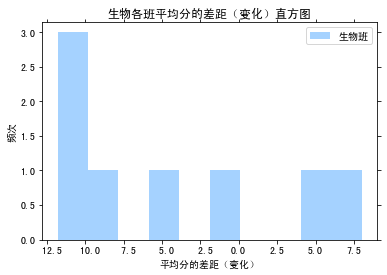

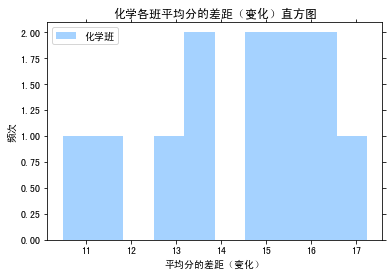

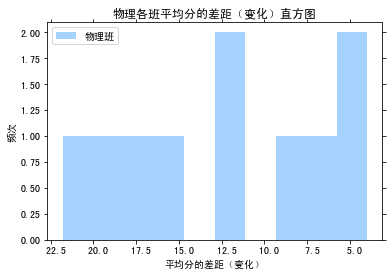

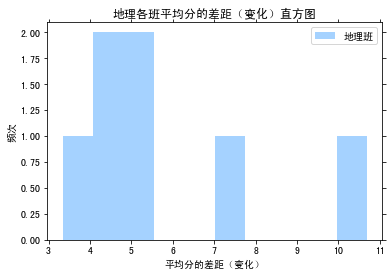

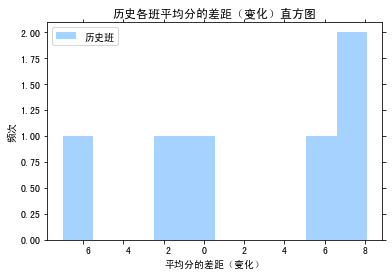

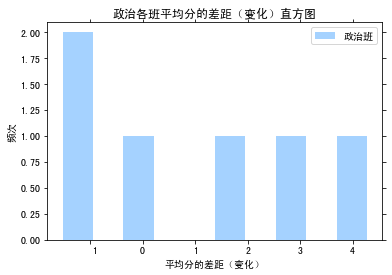

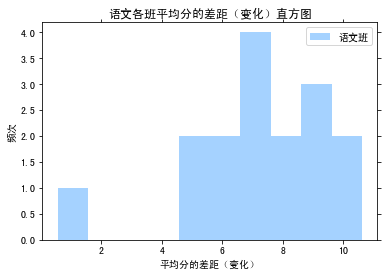

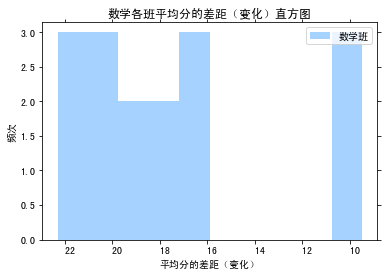

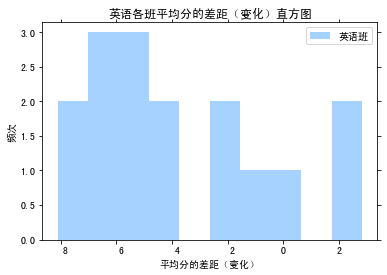

In [13]:
pltHist(banjiVary,'平均分的差距（变化）',10)

得出各个同学的各门课程的变化。统计各个教学班学生变化的平均值。

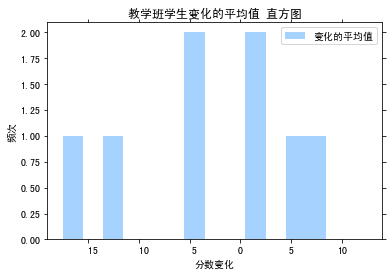

In [14]:
bins = np.arange(min(banjiVaryAve), max(banjiVaryAve), 2)
# 教学班学生变化的平均值 直方图 
plt.hist(banjiVaryAve, bins = bins, label='变化的平均值',color = 'dodgerblue', alpha = 0.4)
# 设置坐标轴标签和标题
plt.title('教学班学生变化的平均值 直方图')
plt.xlabel('分数变化')
plt.ylabel('频次')

# 去除图形顶部边界和右边界的刻度
plt.tick_params(top='off', right='off')

# 显示图例
plt.legend()
# 显示图形
plt.show()

## 第二次课
1. 分数标准化：消除不同试卷之间的难度，区分度的差距
2. 利用标准分进行比较
3. 每个科目，每个班两次考试之间的比较，画柱状图📊
4. 每个图像标准分变化，画柱状图


- 标准化公式：
![标准化公式](https://image.hansking.cn/uPic/202006/g9Rx1i.png)

In [15]:
# 标准化函数
def ZscoreStd(x):
    """Z-score normaliaztion"""
    x = (x - np.mean(x)) / np.std(x)
    return x

In [16]:
# 分数标准化
banjiZscoreStd0=[]
banjiZscoreStd1=[]
for index,sub in enumerate(types[1:1+N]):
    ZscoreStd_=ZscoreStd(banjiAve0[index])
    banjiZscoreStd0.append(ZscoreStd_)
    
    ZscoreStd_=ZscoreStd(banjiAve1[index])
    banjiZscoreStd1.append(ZscoreStd_)

In [17]:
# banjiZscoreStd0

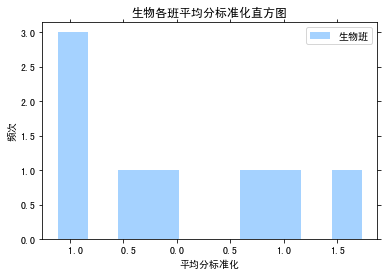

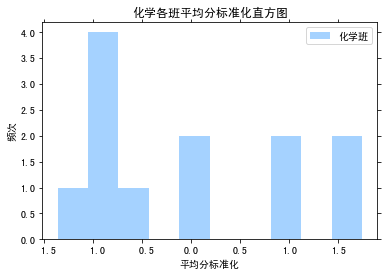

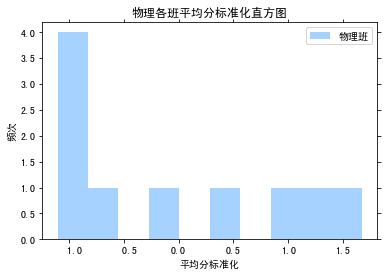

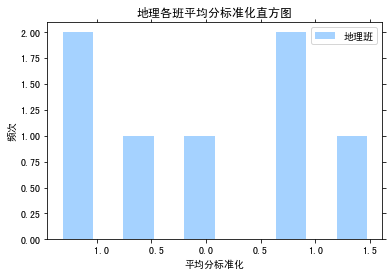

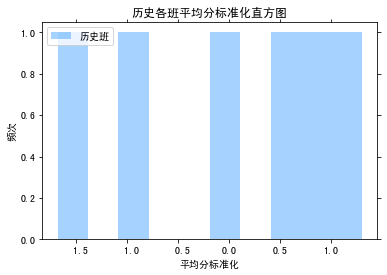

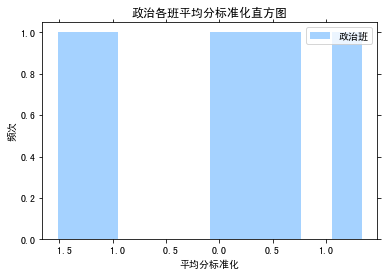

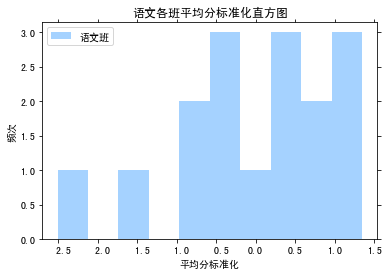

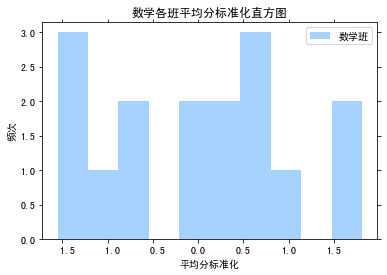

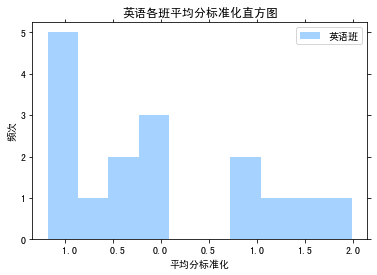

In [18]:
pltHist(banjiZscoreStd0,'平均分标准化',10)

## 第三次课

- 标准化后的数据在0附近不易分析


1. 进行规范化：把每个同学标准化之后的分数，转化为以75为平均值，5为标准差的分数
2. 比较规范化之后的变化，画出相应柱状图📊

In [19]:
def ZscoreNorm(x):
    """Z-score normaliaztion"""
    x = ((x - np.mean(x))*5 / np.std(x))+75
    return x

In [20]:
# 分数规范化
banjiZscoreNorm0=[]
banjiZscoreNorm1=[]
for index,sub in enumerate(types[1:1+N]):
    ZscoreNorm_=ZscoreNorm(banjiAve0[index])
    banjiZscoreNorm0.append(ZscoreNorm_)

    ZscoreNorm_=ZscoreNorm(banjiAve1[index])
    banjiZscoreNorm1.append(ZscoreNorm_)

In [21]:
def pltBar(groupList0, groupList1, title='', bins=None):
    for index,sub in enumerate(types[1:1+N]):
        name_list = groupList0[index].index
        num_list = groupList0[index]
        num_list1 = groupList1[index]

        x =list(range(len(num_list)))
        total_width, n = 0.8, 2
        width = total_width / n

        plt.bar(x, num_list, width=width, label='上学期末',fc = 'dodgerblue', alpha = 0.6)
        for i in range(len(x)):
            x[i] = x[i] + width
        plt.bar(x, num_list1, width=width, label='第一次月考',fc = 'tomato', alpha = 0.6)

        plt.title(subs[index]+'各班考试成绩'+title)
        plt.ylabel('分数')

        plt.tick_params(top='off', right='off')
        plt.xticks(x, name_list, rotation = 90)#显示横坐标
        plt.legend()
        plt.show()

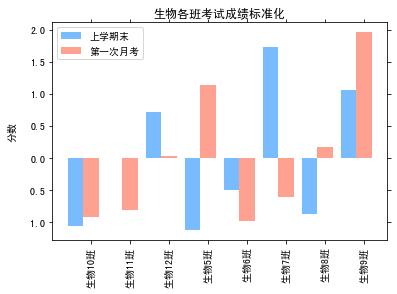

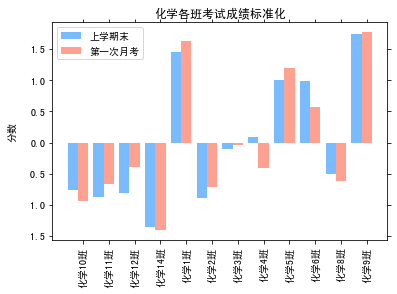

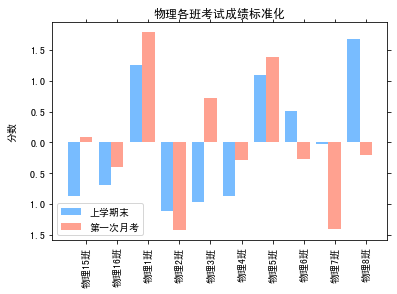

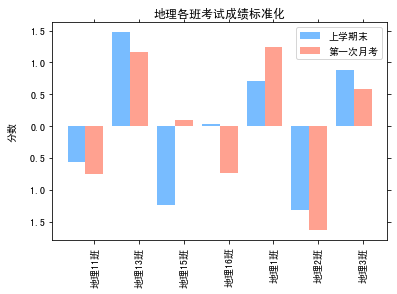

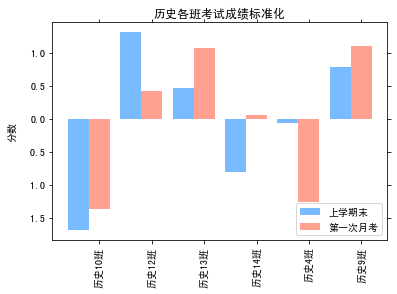

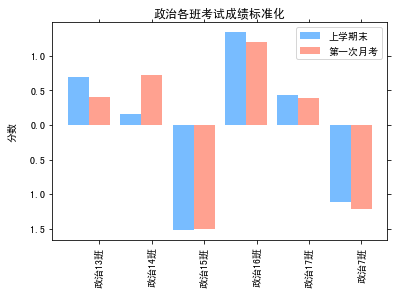

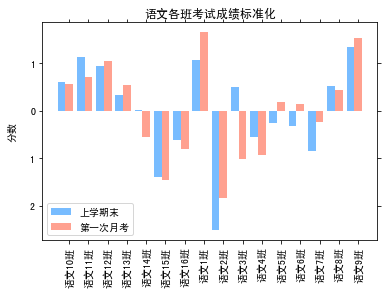

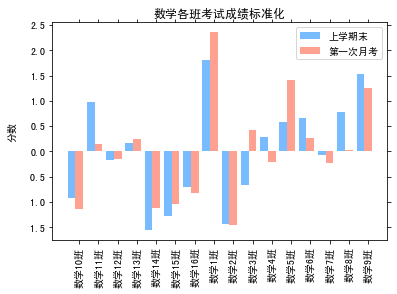

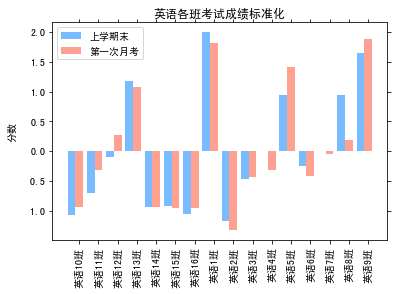

In [22]:
pltBar(banjiZscoreStd0, banjiZscoreStd1, title='标准化')

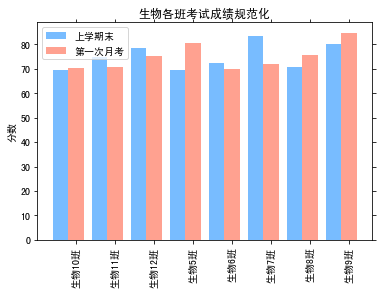

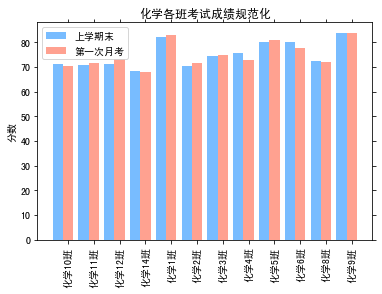

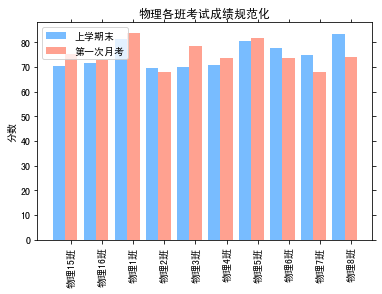

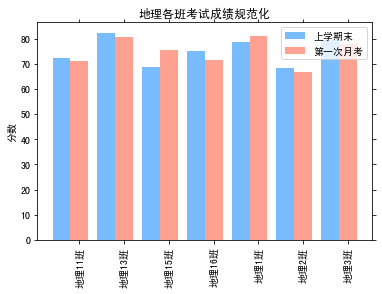

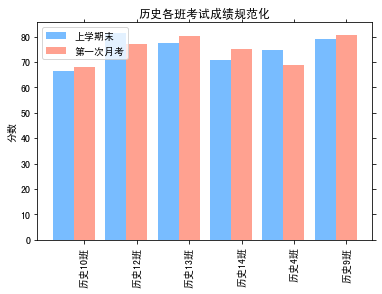

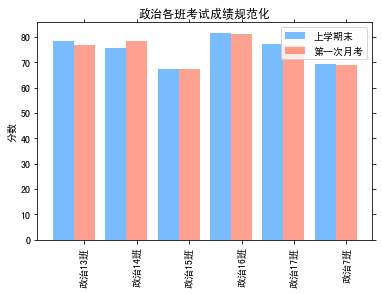

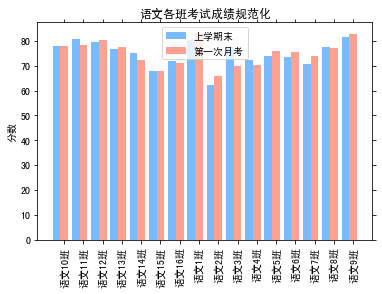

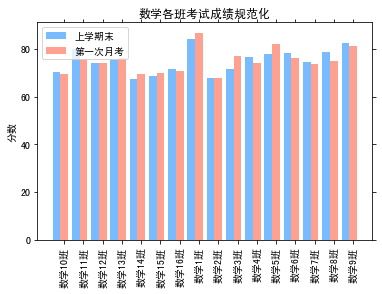

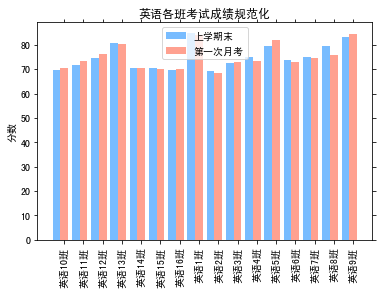

In [23]:
pltBar(banjiZscoreNorm0, banjiZscoreNorm1, title='规范化')